In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving breast_cancer_data.zip to breast_cancer_data.zip


In [ ]:
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['breast_cancer_data.zip']), 'r') as z:
    z.extractall()


data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Changing the datatype for our Xvalues to float
X=data.iloc[:,2:-1].astype(float)
# print(data.isnull().sum()) to check null values

#Mapping the labels to integers
label_map={
    'M':0,
    'B':1,
}
a=data.iloc[:,1].map(label_map)# Changing the labels to binary
y=np.zeros((data.shape[0],2)) # A zero matrix for y values
y[np.arange(data.shape[0]),a]=1 # making y like cofficient or binary matrix for benign/malignant values
y=y.astype(int) # converting the data put in into integer in case if float

## Standardising manualy the feature matrix
mean=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-mean)/std

#Do not add a X0=1 column
print(X.dtypes)

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [ ]:
#writing the phi mu0,1(mean) and covariance functions
phi=a.mean() # mean of data where the diagnosis was benign
m=X.shape[0]
mu0=X[a==0].mean(axis=0) #creating a array consisting of X values where y=0 was true
mu0=mu0.values.reshape(-1,1)  #reshaping for better use in future

mu1=X[a==1].mean(axis=0) # creating a array consisting of X values where y=1 was true
mu1=mu1.values.reshape(-1,1) #reshaping for better use in future

sigma=np.zeros((X.shape[1],X.shape[1])) #a square zero matrix of dimensions of no_of_columns
for i in range (m):
  xi=X.iloc[i].values.reshape(-1, 1)
  if(a[i]==0):mui=mu0
  else : mui=mu1
  sigma+=(xi-mui)@(xi-mui).T

cov=sigma/m # the covariance matrix

In [ ]:
from numpy.linalg import inv, det
# Inverting the matrix as well as getting the determinant
sigma_inv = inv(cov)
sigma_det = det(cov)


In [ ]:
# A function to return the likelihoood value from the distribution
# The output is always supposed to be a value and not a matrix
def gaussian_log_likelihood(x, mu, sigma_inv, sigma_det):
    diff = x - mu
    z=diff.T @ sigma_inv @ diff
    return (-0.5 * z) - (0.5 * np.log(sigma_det))
    ''''''


In [ ]:
preds = [] # creating an prediction array

for i in range(m):
    x = X.iloc[i].values.reshape(-1, 1) # Reshaping into a column matrix
    # Applying the bayes rule
    log_p0 = gaussian_log_likelihood(x, mu0, sigma_inv, sigma_det) + np.log(1 - phi)
    log_p1 = gaussian_log_likelihood(x, mu1, sigma_inv, sigma_det) + np.log(phi)

    pred = 1 if log_p1 > log_p0 else 0
    preds.append(pred)

preds = np.array(preds)


In [ ]:
from sklearn.metrics import accuracy_score
# this code block is for checking our accuracy
true_labels = a.values if hasattr(a, 'values') else a  # pandas/numpy support
print("Training Accuracy:", accuracy_score(true_labels, preds))


Training Accuracy: 0.9648506151142355


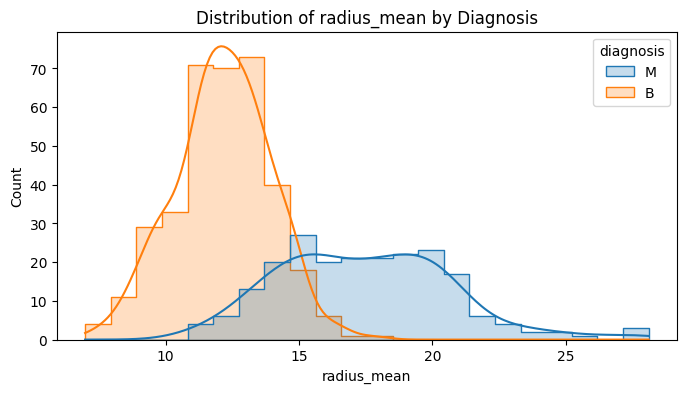

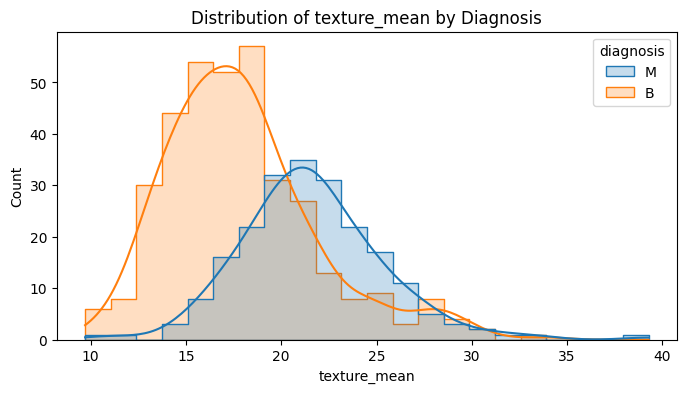

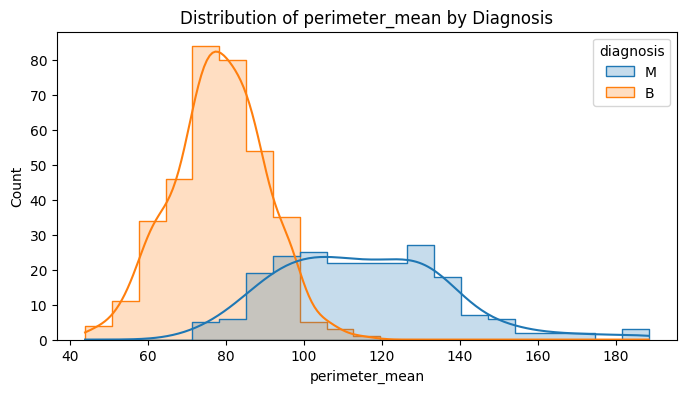

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data.iloc[:,2:-1]=data.iloc[:,2:-1].astype(float)
# Plot distributions for a few features by class
features = ['radius_mean', 'texture_mean', 'perimeter_mean']
for feat in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=feat, hue=data['diagnosis'], kde=True, element="step")
    plt.title(f'Distribution of {feat} by Diagnosis')
    plt.show()


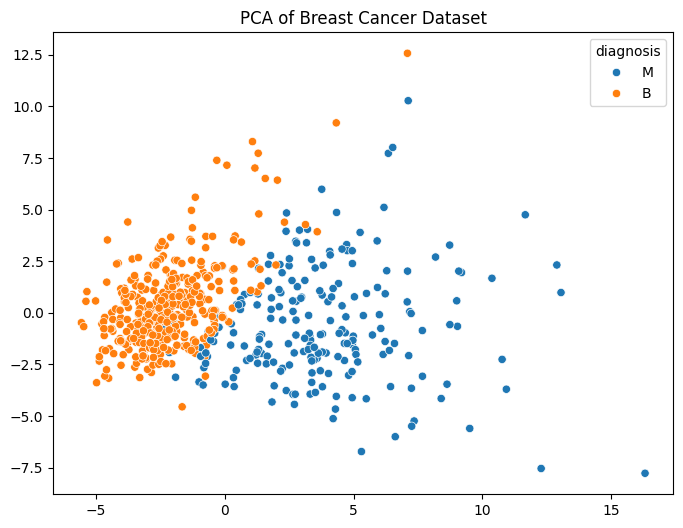

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['diagnosis'])
plt.title('PCA of Breast Cancer Dataset')
plt.show()


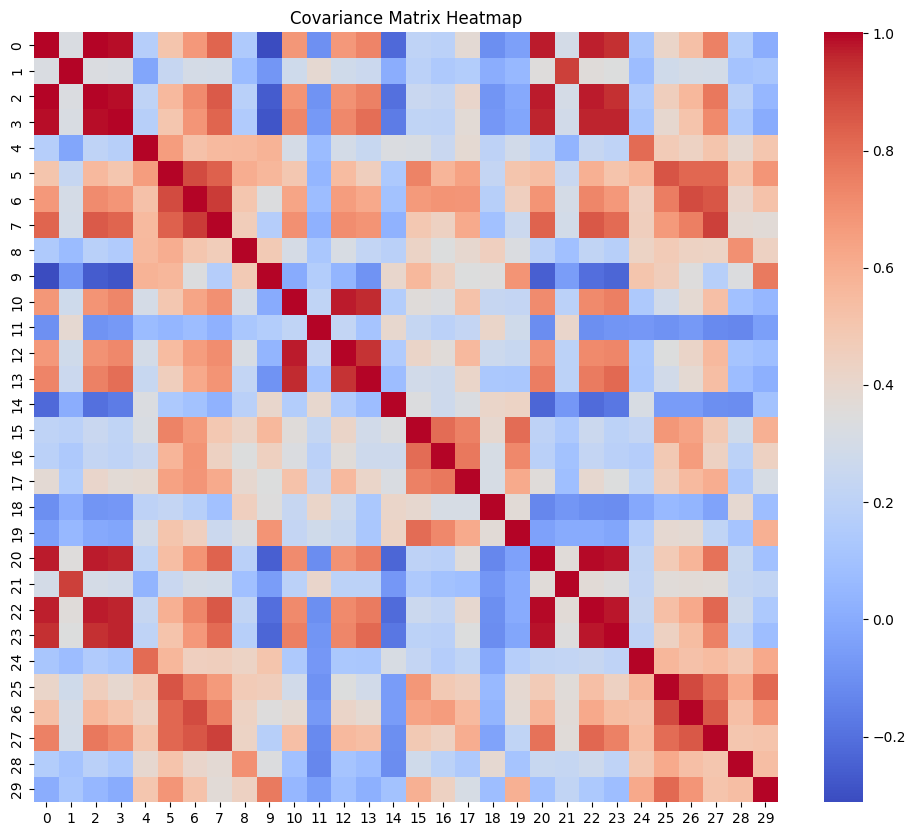

In [ ]:
import numpy as np

cov_matrix = np.cov(X.T)
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, cmap='coolwarm')
plt.title("Covariance Matrix Heatmap")
plt.show()
